In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import sklearn.cluster as cluster
from sklearn import metrics

# Read in the CSV file
df = pd.read_excel('/content/car details v4.xlsx')

# View the first few rows of the dataset
print(df.head())

            Make                            Model    Price  Year  Kilometer  \
0          Honda              Amaze 1.2 VX i-VTEC   505000  2017      87150   
1  Maruti Suzuki                  Swift DZire VDI   450000  2014      75000   
2        Hyundai             i10 Magna 1.2 Kappa2   220000  2011      67000   
3         Toyota                         Glanza G   799000  2019      37500   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000  2018      69000   

  Fuel Type Transmission   Location   Color   Owner Seller Type   Engine  \
0    Petrol       Manual       Pune    Grey   First   Corporate  1198 cc   
1    Diesel       Manual   Ludhiana   White  Second  Individual  1248 cc   
2    Petrol       Manual    Lucknow  Maroon   First  Individual  1197 cc   
3    Petrol       Manual  Mangalore     Red   First  Individual  1197 cc   
4    Diesel       Manual     Mumbai    Grey   First  Individual  2393 cc   

            Max Power              Max Torque Drivetrain  Length  Wi

In [26]:
df.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,1.874000e+03,1874.000000,1.874000e+03,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000
mean,1.718279e+06,2016.713447,5.317814e+04,4281.512807,1767.886339,1588.967983,5.295091,52.217343
std,2.426090e+06,3.138477,5.878833e+04,436.220747,131.344883,134.627659,0.807008,15.167250
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1213.000000,2.000000,15.000000
25%,5.000000e+05,2015.000000,2.801975e+04,3985.000000,1695.000000,1485.000000,5.000000,42.000000
50%,8.424995e+05,2017.000000,4.879750e+04,4360.000000,1770.000000,1544.000000,5.000000,50.000000
75%,1.908250e+06,2019.000000,7.100000e+04,4620.000000,1831.000000,1670.750000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [27]:
corr_matrix= df.corr()

In [28]:
corr_matrix

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
Price,1.000000,0.309381,-0.147276,0.568875,0.577100,0.092968,-0.024879,0.586109
Year,0.309381,1.000000,-0.291740,0.085178,0.182220,0.126849,-0.000113,0.044859
Kilometer,-0.147276,-0.291740,1.000000,0.037817,0.008479,0.085728,0.111103,0.052447
Length,0.568875,0.085178,0.037817,1.000000,0.797228,0.194704,0.298527,0.809812
Width,0.577100,0.182220,0.008479,0.797228,1.000000,0.326928,0.229056,0.791316
Height,0.092968,0.126849,0.085728,0.194704,0.326928,1.000000,0.695373,0.408717
Seating Capacity,-0.024879,-0.000113,0.111103,0.298527,0.229056,0.695373,1.000000,0.313928
Fuel Tank Capacity,0.586109,0.044859,0.052447,0.809812,0.791316,0.408717,0.313928,1.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1874 non-null   object 
 1   Model               1874 non-null   object 
 2   Price               1874 non-null   int64  
 3   Year                1874 non-null   int64  
 4   Kilometer           1874 non-null   int64  
 5   Fuel Type           1874 non-null   object 
 6   Transmission        1874 non-null   object 
 7   Location            1874 non-null   object 
 8   Color               1874 non-null   object 
 9   Owner               1874 non-null   object 
 10  Seller Type         1874 non-null   object 
 11  Engine              1874 non-null   object 
 12  Max Power           1874 non-null   object 
 13  Max Torque          1874 non-null   object 
 14  Drivetrain          1874 non-null   object 
 15  Length              1874 non-null   int64  
 16  Width 

In [30]:
df = df.drop(['Year','Kilometer','Fuel Type','Transmission','Color','Owner','Seller Type','Max Power','Max Torque','Drivetrain','Length','Height','Fuel Tank Capacity','Width'], axis=1)

In [31]:
df.head(2)

,Make,Model,Price,Location,Engine,Seating Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,Pune,1198 cc,5
1,Maruti Suzuki,Swift DZire VDI,450000,Ludhiana,1248 cc,5


In [33]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
# df['Make_enc'] = encoder.fit_transform(df['Make',''])
columns = ['Make', 'Model','Location','Engine']
for col in columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [34]:
df.head(2)

,Make,Model,Price,Location,Engine,Seating Capacity
0,7,92,505000,56,7,5
1,18,731,450000,40,9,5


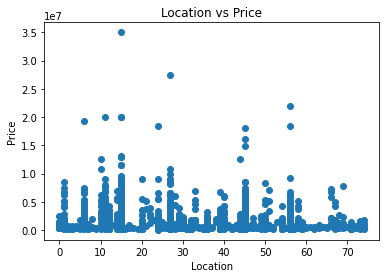

In [35]:
import matplotlib.pyplot as plt
plt.scatter(df['Location'], df['Price'])
plt.title('Location vs Price')
plt.xlabel('Location')
plt.ylabel('Price')
plt.show()

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [37]:
# Normalization function 
# def norm_func(i):
#     x = (i-i.min())/(i.max()-i.min())
#     return (x)

In [38]:
# Normalized data frame (considering the numerical part of data)
# df_norm = norm_func(df.iloc[:,:])

K Means Clustering


Using Elbow method to find optimum number of clusters

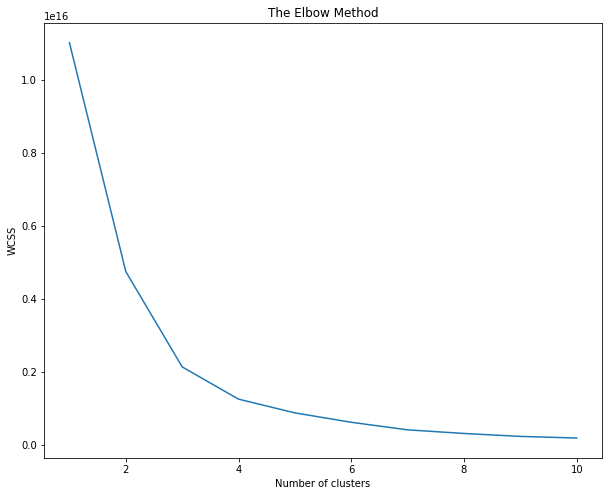

In [39]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 200)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 8)) 
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As per the plot optimum Number of clusters are 3

To confirm the same,Lets use Silhouette score

In [40]:
for i in range(3,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(df).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.7600547307307479
Silhouette score for k(clusters) = 4 is 0.7006268194010151
Silhouette score for k(clusters) = 5 is 0.6740545356799036
Silhouette score for k(clusters) = 6 is 0.659740306067796
Silhouette score for k(clusters) = 7 is 0.6556646831317805
Silhouette score for k(clusters) = 8 is 0.6206153104741627
Silhouette score for k(clusters) = 9 is 0.6231738890978809
Silhouette score for k(clusters) = 10 is 0.5704020488202594
Silhouette score for k(clusters) = 11 is 0.5631705019814751
Silhouette score for k(clusters) = 12 is 0.5748166542539213


As per the Silhouette score also,k=3 is the optimum number of clusters

In [41]:
# Set the number of clusters
k = 3

# Fit the KMeans model to the data
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [42]:
# Get the cluster labels
labels = kmeans.labels_


In [43]:
# Add the labels to the dataframe
df['cluster'] = labels


In [44]:
# View the first few rows of the clustered data
df.head()

,Make,Model,Price,Location,Engine,Seating Capacity,cluster
0,7,92,505000,56,7,5,1
1,18,731,450000,40,9,5,1
2,8,940,220000,39,6,5,1
3,29,453,799000,41,6,5,1
4,29,503,1950000,45,58,7,0


In [45]:
# Group by cluster and calculate the mean of each column
grouped = df.groupby('cluster').mean()

In [46]:
# Print the grouped data
grouped

,Make,Model,Price,Location,Engine,Seating Capacity
cluster,,,,,,
0,19.603509,555.610526,2.102958e+06,32.003509,53.912281,7.084211
1,13.793103,520.232759,8.662279e+05,32.816092,18.987548,4.992337
2,13.289908,353.333945,3.149303e+06,29.710092,69.119266,4.939450
